In [1]:
%pylab inline

import numpy as np
import seaborn as sns

from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


# Standard Error (the standard deviation of the sample means)

**표준오차** (Standard Error)는 표본평균을 찾아서 모평균을 추정할때 얼마나 정확하게 모평균을 추정하는지 판단할때 사용합니다 (**평균의 정확도**)

Central limit theorem ( $ n >= 30 $ 일때 유효함)에 따르면 sample size n이 커짐에 따라, 표본평균의 분포 (the distribution of the sample means)는 모집단의 분포 (the distribution of the population)과는 상관없이 정규분포를 따릅니다. 

sample size가 커짐에 따라서, 표본 평균은 분포의 중심(the center of the distribution)에 점차 수렴되기 때문에 std는 줄어듭니다<br>
아래의 공식은 표본 평균들의 표준편차 (표준오차)의 공식입니다.

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $$

* $ \sigma_{\bar{x}} $ The standard deviation of the sample means (표본 평균들의 표준편차) - 공식적인 용어로는 [standard error (**표준오차**)](https://en.wikipedia.org/wiki/Standard_error) 라고 함 
* $ \sigma $ : the standard deviation of the population (모집단의 표준편차)
* $ n $ : sample size

population mean: 2.5287814469628986
sample mean(1) : 2.8536303757444257
sample mean(2) : 2.586890902781109 <- 표본크기가 커짐에 따라 표본평균은 모집단의 평균을 approximate한다

population std: 2.5202436924261153
sample std(1) : 2.911251467028967
sample std(2) : 0.2619172346862947 <- 표본크기가 커짐에 따라 표본표준편차는 줄어든다

standard error(1): 0.4601314402506317
standard error(1): 0.04601314402506317


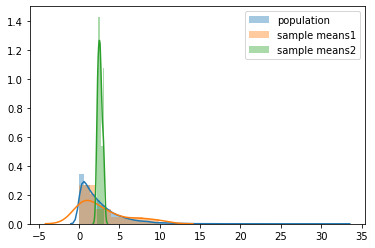

In [2]:
population = np.random.exponential(2.5, size=10000)
sample_means1 = [np.random.choice(population, 1).mean() for _ in range(30)]
sample_means2 = [np.random.choice(population, 100).mean() for _ in range(30)]

print('population mean:', population.mean())
print('sample mean(1) :', np.mean(sample_means1))
print('sample mean(2) :', np.mean(sample_means2), '<- 표본크기가 커짐에 따라 표본평균은 모집단의 평균을 approximate한다')
print()
print('population std:', population.std())
print('sample std(1) :', np.std(sample_means1))
print('sample std(2) :', np.std(sample_means2), '<- 표본크기가 커짐에 따라 표본표준편차는 줄어든다')
print()
print('standard error(1):', population.std()/np.sqrt(30))
print('standard error(1):', population.std()/np.sqrt(100*30))

sns.distplot(population, label='population')
px = sns.distplot(sample_means1, label='sample means1')
px = sns.distplot(sample_means2, label='sample means2')

legend()

## Problem 1

샘플링을 통해서 아래와 같은 데이터를 얻었고.. 표본평균의 정확도를 알아보기 위해서 표준오차를 계산하여라

[14, 36, 45, 70, 105]


In [3]:
data = [14, 36, 45, 70, 105]
print('standard error:', np.std(data)/np.sqrt(len(data)))

standard error: 13.945608627808252


## Problem 2
Q. 30대 남성의 혈압은 정규분포를 따르며, 평균 122 mmHg 그리고 표준편차는 10mmHg.<br>
이때 16명의 남성이 선택되었고 표본평균이 125mmHg 이상일 확률은?

In [4]:
se = 10/np.sqrt(16)
print('standard error:', se)
print('125mmHg 이상일 확률:', 1 - norm(loc=122, scale=se).cdf(125))

standard error: 2.5
125mmHg 이상일 확률: 0.11506967022170822


# Finite Population Correction Factor 유한 모집단 수정 계수


만약 아래의 조건처럼 모집단의 크기와 표본의 크기를 비교했을때, 표본집단이 5% 이상을 넘는다면 finite population correction factor를 적용해야 합니다. <br> population size가 크다면 샘플링시에 크게 영향이 없습니다. <br>
예를 들어서 미국인 전체 인구중에서 샘플링을 한다면 이번에 남자가 나왔을때 다음 남자가 뽑힐 확률에 크게 영향을 미치지 않습니다. <br>

그런데.. population size 자체가 작고, 샘플링을 했을때 예를 들어서 바구니에 10개의 파란색 그리고 빨간색 구슬이 들어있을때, <br>
이번에 파란색 구슬을 뽑았다면.. 그 다음 파란색이 나올 확률이 크게 변하게 됩니다. (이미 파란색을 뽑았기 때문에..)

따라서 population size가 작고, 일반적으로 sample size가 population size의 5% 이상이 된다면.. <br>
Finite population correction factor $ \sqrt{ \frac{N-n}{N-1}} $ 를 적용해야 합니다

$$ \text{if}\ \frac{n}{N} > 0.05 $$


$$ \begin{align} \sigma_{\bar{x} } = \frac{\sigma}{\sqrt{n}} \sqrt{ \frac{N-n}{N-1}}   
\end{align} $$


아래의 코드에서 보여주듯이, finite population correction factor를 적용시 일반적인 standard error보다 더 낮은 standard error값을 내 놓는다

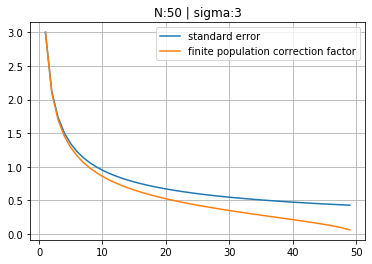

In [5]:
N = 50
sigma = 3
n = np.arange(1, N)

sns.lineplot(n, sigma/np.sqrt(n), label='standard error')
sns.lineplot(n, sigma/np.sqrt(n) * np.sqrt( (N-n)/(N-1)), label='finite population correction factor')
title(f'N:{N} | sigma:{sigma}')
grid()
print()

# Sampling Binomial Distribution

비율의 표본분포 (the sampling distribution of the proportion)은 random variable이 binomially distributed 일때 사용합니다.<br>

**표본비율의 평균**

$$ p_s = \frac{s}{n} $$


**The standard error of the proportion** 

$$ \sigma_p = \sqrt{ \frac{p(1-p)}{n} } $$

**Z-score**

$$ z_p = \frac{p_s -p}{\sigma_p} $$

* $ p_s $ : the sample mean of the proportion
* $ p $ : the population proportion
* $ \sigma_p $ : the standard error of the proportion





## Problem 1

Q. A그룹의 15%의 사람이 왼손잡이이다.<br>
125명의 샘플중에 10명이 왼손잡이라면 통계적 유의미성을 갖는가? 


$$ \begin{align} \sigma_p &= \sqrt{\frac{p(1-p)}{n}} \\
&= \sqrt{\frac{0.15(1-0.15)}{125}} \\
&= 0.0319
\end{align} $$

$$ \begin{align} 
p_s = \frac{s}{n} = \frac{10}{125} = 0.08
\end{align} $$

$$ \begin{align} 
Z_{p} = \frac{0.08 - 0.15}{0.0319} = -2.19
\end{align} $$

$$ P(\text{between 0.08 and 0.15}) = 0.5 - CDF(-2.19) = 0.4858 $$

즉 8%에 대한 Z-score는 -2.19 이며, 정규분포의 가장 왼쪽에서 Z-score = -2.19까지의 확률을 나타냅니다. <br>
15%가 population mean이기 때문에 확률은 50%가 됩니다. <br>
따라서 8% ~ 15% 사이에 왼손잡이가 있을 확률은 `0.5 - norm.cdf(-2.19) = 0.4858` 로서  48.58%가 됩니다.


만약 125명중 15%가 왼손잡이일 확률이 맞다면, 8%에 대한 확률은 `norm.cdf(-2.19) = 0.014` 입니다.<br>
즉 1.4%의 확률이며 이는 5%보다도 작습니다. <br>
따라서 해당 샘플을 통계 통계적 유의미성이 없으며, 15%가 왼손잡이라는 주장을 뒷받침하지 않습니다.


In [6]:
p = 0.15
p_s = 10/125
sigma = np.sqrt(p * (1-p)/125)

z_score = (p_s - p)/sigma
between_probabiilty = 0.5 - norm.cdf(z_score)

print('population proportion            :', p)
print('sample proportion                :', p_s)
print('standard error                   :', sigma)
print('z-score                          :', z_score)
print('probability between 0.08 and 0.15:', between_probabiilty)
print('probability of 0.08              :', norm.cdf(z_score))

population proportion            : 0.15
sample proportion                : 0.08
standard error                   : 0.03193743884534263
z-score                          : -2.1917850187980226
probability between 0.08 and 0.15: 0.4858024833201109
probability of 0.08              : 0.014197516679889128


# Confidence Intervals

표본오차 (sampling error)는 랜덤으로 선택된 표본들의 sample mean과 population mean의 차이를 뜻합니다. 


## Large Samples and Sigma Known

Margin Error $ \mathit{E} $ 는 허용오차라고 하며 다음과 같이 계산할 수 있습니다.

$$ \mathit{E} =  z_{c/2} \cdot \sigma_{\bar{x}} $$

* $ \bar{x} $ : sample mean 
* $ z_c $ : c는 confidence level을 뜻하며 90% confidence level은 1.6448 `norm.ppf(0.5+0.45)` 입니다
* $ \sigma_{\bar{x}} $ : standard error를 뜻하며 $ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $ 입니다

Confidence Interval은 다음과 같습니다.

$$ CI = \bar{x} \pm z_{c/2} \cdot \sigma_{\bar{x}}  $$ 


> Confidence Interval은 예를 들어 90% confidence level을 말할때 <br> 
> lower bound 그리고 upper bound 사이에 90%의 확률로 population mean이 있다는 뜻이 아닙니다.<br>
> 10번의 샘플링을 해서, 10번의 sample mean을 구하고, 10번의 confidence interval을 구하면, <br>
> 10개중의 9개는 true population mean을 포함한다는 뜻 입니다.

### Problem 1 

Q. 한 쇼핑몰의 샘플링한 결과 1인당 평균 구매 금액은 78.25달러 이고 population standard deviation은 22.5달러 이다. <br>
이때 40주문건의 90% confidence interval에 대해서 계산하여라

$$ \begin{align}
\bar{x} &= 75.25 \\
\sigma &= 22.5 \\
\sigma_{\bar{x}} &= \frac{\sigma}{\sqrt{n}} = \frac{22.5}{\sqrt{40}} = 3.558 \\
z_{c/2} &= \text{norm.ppf}(0.5 + 0.45) = 1.6448
\end{align} $$



표본평균 (sample mean)이 confidence interval의 중심에 있습니다. <br>
따라서 90%의 confidence interval을 봤을때, 45%는 왼쪽에, 다른 45%는 오른쪽에 위치하게 됩니다.

margin error $ \mathit{E} $ 는 허용오차라고 합니다.

$$ \begin{align} 
\mathit{E} &= z_c \sigma_{\bar{x}}  \\
&= 1.6448 \cdot 3.558 \\
&= 5.8521 
\end{align} $$



$$ \begin{align} 
\text{limit} &= \bar{x} \pm z_c \sigma_{\bar{x}} \\
&= 78.25 \pm 1.64 \cdot 3.558 \\
&= 78.25 \pm 5.8521
\end{align} $$

* upper limit (upper bound) : $ \bar{x} + z_c sigma_{\bar{x}} $
* lower limit (lower bound) : $ \bar{x} - z_c sigma_{\bar{x}} $

### Problem 2

Q.한 쇼핑몰의 샘플링한 결과 1인당 평균 구매 금액은 78.25달러 이고 population standard deviation은 22.5달러 이다. 5달러를 허용오차(margin of error)로 간주했을때, 90% confidence interval을 구현하기 위해서 필요한 최소한의 sample size크기는?

$$ \begin{align}
\mathit{E} &= z_{c/2} \sigma_{\bar{x}} \\ 
&= z_{c/2} \left( \frac{\sigma}{\sqrt{n}} \right) \\
\sqrt{n} &= \frac{z_{c/2} \sigma}{\mathit{E}} \\
n &= \left[ \frac{z_{c/2} \sigma}{\mathit{E}} \right]^2 \\
&= \left[ \frac{1.6448 \cdot 22.5}{5} \right]^2 \\
&= 54.78
\end{align} $$

sample size는 interger값이어야 하기 때문 약 55로 반올림해서 사용하면 됩니다.<br>


## Small Samples and Sigma Unknown

Population standard deviation $ \sigma $ 를 모르는 상태일때는, sample standard deviation $ s $ 를 대신 사용합니다.<br>
$ \sigma $ 대신 $ s $ 를 사용하면서 Student's t-distribution (이하 t-distribution)을 사용해야 합니다.<br>

* Sample size가 30개 이하일경우, population은 정규분포를 따라야 하며, 이 경우 t-distribution을 사용 가능합니다.
* sample size가 30개 이상일 경우, central limit theorem 을 사용해서 정규분포를 이용할수 있습니다. (population은 전혀 다른 분포를 따라도 OK)